In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline


df = pd.read_excel("/Users/egortishchenko/Downloads/SoA - Admission case - Data - vF - 14.02.2023.xlsx")
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 225)

In [7]:
df #Я так понял, что Aster и Astra - одно и то же

,Main bank,Gender,Age,A serious and stable company,A progressive and modern company,Service quality,Offers all common credit services,Ease and speed of processing credit products,Company’s lifetime on the market,A trustworthy company
0,Competitor name,Respondent,Respondent,Satisfoction,Importance,Importance,Satisfaction,Satisfaction,Importance,Importance
1,Bank Aster,2,38,5,4,5,5,5,3,5
2,Bank Aster,2,37,4,4,5,5,4,4,5
3,Bank Rose,1,35,5,4,5,5,4,5,5
4,Bank Snowdrop,1,47,5,4,4,5,5,4,5
5,Bank Rose,2,22,5,5,5,5,5,4,5
6,Bank Barberry,2,42,5,4,5,5,5,5,5
7,Bank Barberry,2,26,5,4,4,5,4,4,5
8,Bank Aster,2,26,5,4,5,4,5,5,5
9,Bank Rose,2,39,4,3,4,3,4,4,5


In [8]:
importance = ['A progressive and modern company', 'Service quality', 'Company’s lifetime on the market', 'A trustworthy company']
satisfaction = ['A serious and stable company', 'Offers all common credit services', 'Ease and speed of processing  credit products']
df = df.drop(0) #0-вая строка мешает проводить статистические наблюдения

In [9]:
df.dtypes #Видим, что столбики не типа int, что нужно исправить

Main bank                                        object
Gender                                           object
Age                                              object
A serious and stable company                     object
A progressive and modern company                 object
Service quality                                  object
Offers all common credit services                object
Ease and speed of processing  credit products    object
Company’s lifetime on the market                 object
A trustworthy company                            object
dtype: object

In [10]:
df = df.astype({'Gender': 'int', 'Age': 'int', 'A serious and stable company': 'int', 
                'A progressive and modern company': 'int', 'Service quality': 'int',
               'Offers all common credit services': 'int', 'Ease and speed of processing  credit products': 'int',
               'Company’s lifetime on the market': 'int', 'A trustworthy company': 'int'})


In [11]:
df.dtypes #Теперь все ок

Main bank                                        object
Gender                                            int64
Age                                               int64
A serious and stable company                      int64
A progressive and modern company                  int64
Service quality                                   int64
Offers all common credit services                 int64
Ease and speed of processing  credit products     int64
Company’s lifetime on the market                  int64
A trustworthy company                             int64
dtype: object

# Проверим наши данные на NA и "Невозмоэжные значения"

In [12]:
for i in df.columns:
    print(i)
    print(df[i].value_counts(dropna = False))
    print('\n')


Main bank
Bank Aster       60
Bank Snowdrop    52
Bank Rose        45
Bank Barberry    44
Bank Bramble     23
Name: Main bank, dtype: int64


Gender
1    115
2    109
Name: Gender, dtype: int64


Age
19    20
42    16
26    16
18    15
47    11
33    10
48    10
41     9
20     9
39     8
27     7
52     7
44     7
36     7
22     6
29     6
61     5
64     4
56     4
28     4
51     4
40     4
31     4
49     4
38     4
25     3
23     3
34     3
63     2
21     2
45     2
32     1
55     1
54     1
46     1
37     1
62     1
35     1
24     1
Name: Age, dtype: int64


A serious and stable company
5    146
4     58
3     13
2      4
1      3
Name: A serious and stable company, dtype: int64


A progressive and modern company
4    118
5     51
3     39
1     10
2      4
9      2
Name: A progressive and modern company, dtype: int64


Service quality
5    143
4     67
3      9
1      5
Name: Service quality, dtype: int64


Offers all common credit services
5    112
4     77
3     34
2    

<font size='4'>Видим, что NA нет, но есть 9 в "A trustworthy company" и "A progressive and modern company". Заменим их на mode по столбику, чтобы не искажать общую картину, хотя ошибочных данных мало.</font>

In [13]:
print(df["A trustworthy company"].mode())
print(df["A progressive and modern company"].mode())

0    5
Name: A trustworthy company, dtype: int64
0    4
Name: A progressive and modern company, dtype: int64


In [14]:
df["A trustworthy company"] = df["A trustworthy company"].replace(9, 5)
df["A progressive and modern company"] = df["A progressive and modern company"].replace(9, 4)
for i in df.columns:
    print(i)
    print(df[i].value_counts(dropna = False))
    print('\n')



Main bank
Bank Aster       60
Bank Snowdrop    52
Bank Rose        45
Bank Barberry    44
Bank Bramble     23
Name: Main bank, dtype: int64


Gender
1    115
2    109
Name: Gender, dtype: int64


Age
19    20
42    16
26    16
18    15
47    11
33    10
48    10
41     9
20     9
39     8
27     7
52     7
44     7
36     7
22     6
29     6
61     5
64     4
56     4
28     4
51     4
40     4
31     4
49     4
38     4
25     3
23     3
34     3
63     2
21     2
45     2
32     1
55     1
54     1
46     1
37     1
62     1
35     1
24     1
Name: Age, dtype: int64


A serious and stable company
5    146
4     58
3     13
2      4
1      3
Name: A serious and stable company, dtype: int64


A progressive and modern company
4    120
5     51
3     39
1     10
2      4
Name: A progressive and modern company, dtype: int64


Service quality
5    143
4     67
3      9
1      5
Name: Service quality, dtype: int64


Offers all common credit services
5    112
4     77
3     34
2      1
Name:

<font size='4'>Теперь данные готовы к анализу</font>


# Посмотрим на данные молодых пользователей, их распределиние и т.д.

In [15]:
mask_young = (df['Age'] >= 18) & (df['Age'] <= 30)

In [16]:
df_young = df[mask_young]

In [17]:
df_young.describe()

,Gender,Age,A serious and stable company,A progressive and modern company,Service quality,Offers all common credit services,Ease and speed of processing credit products,Company’s lifetime on the market,A trustworthy company
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,1.434783,22.423913,4.608696,3.728261,4.641304,4.521739,4.380435,3.782609,4.663043
std,0.498445,3.843744,0.797751,0.950457,0.525849,0.583251,0.643520,1.211901,0.598114
min,1.000000,18.000000,1.000000,1.000000,3.000000,3.000000,2.000000,1.000000,2.000000
25%,1.000000,19.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,1.000000,21.500000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000
75%,2.000000,26.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,2.000000,29.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<font size='4'>Посмотрим на распределение признаков.</font>

<AxesSubplot:xlabel='Gender', ylabel='Density'>

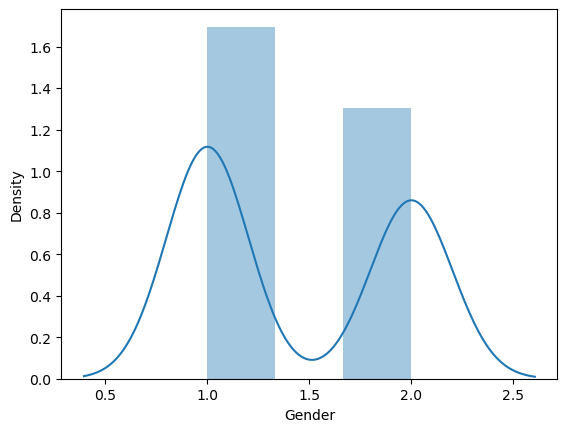

In [18]:
sns.distplot(df_young['Gender']) 

<font size='4'>Мужчин чуть больше.</font>

<AxesSubplot:xlabel='Age', ylabel='Density'>

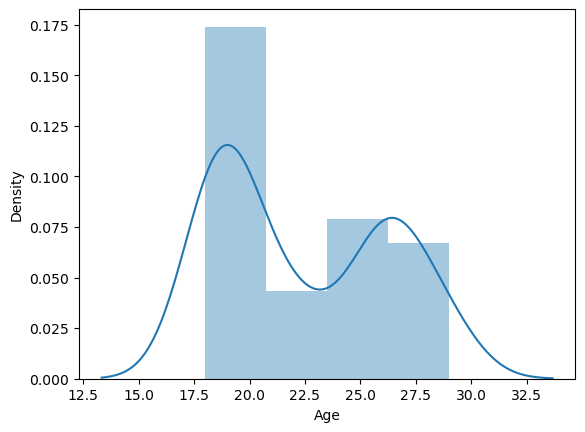

In [19]:
sns.distplot(df_young['Age'])

<AxesSubplot:xlabel='A serious and stable company', ylabel='Density'>

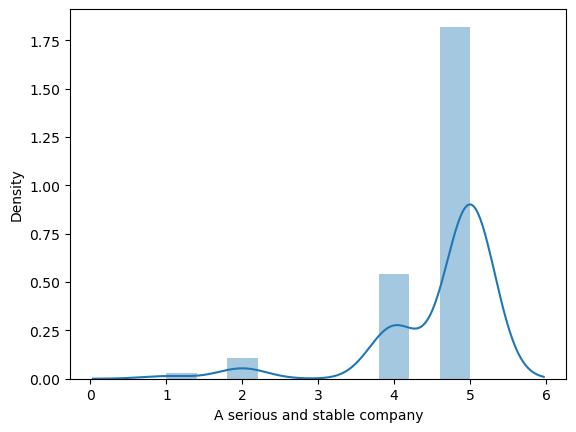

In [20]:
sns.distplot(df_young['A serious and stable company']) # Satisfoction

<AxesSubplot:xlabel='A progressive and modern company', ylabel='Density'>

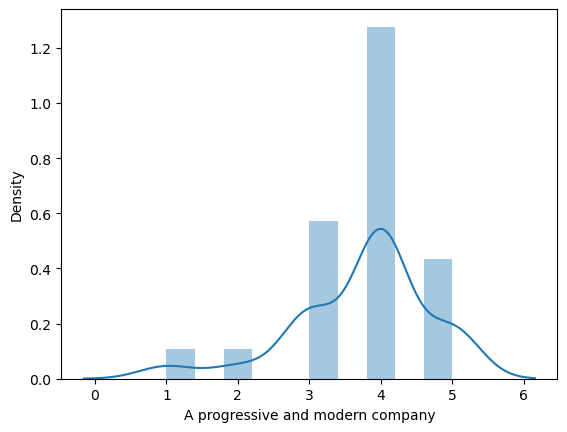

In [21]:
sns.distplot(df_young['A progressive and modern company']) # Importance

<AxesSubplot:xlabel='Service quality', ylabel='Density'>

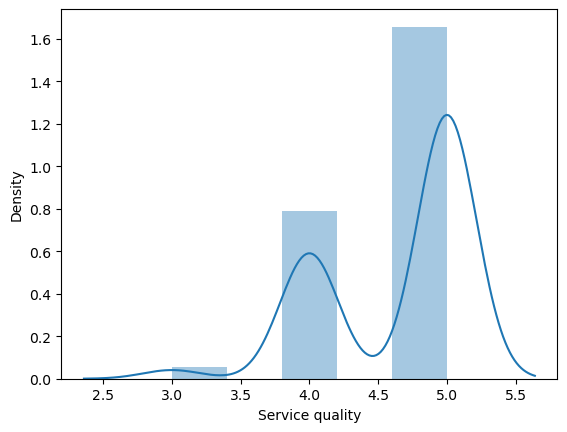

In [22]:
sns.distplot(df_young['Service quality']) # Importance

<AxesSubplot:xlabel='Offers all common credit services', ylabel='Density'>

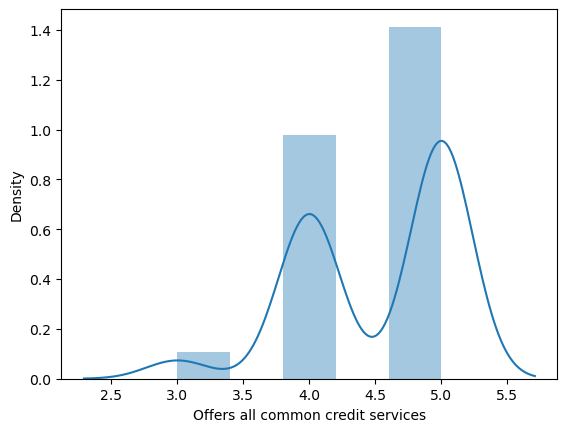

In [23]:
sns.distplot(df_young['Offers all common credit services']) # Satisfaction

<AxesSubplot:xlabel='Ease and speed of processing  credit products', ylabel='Density'>

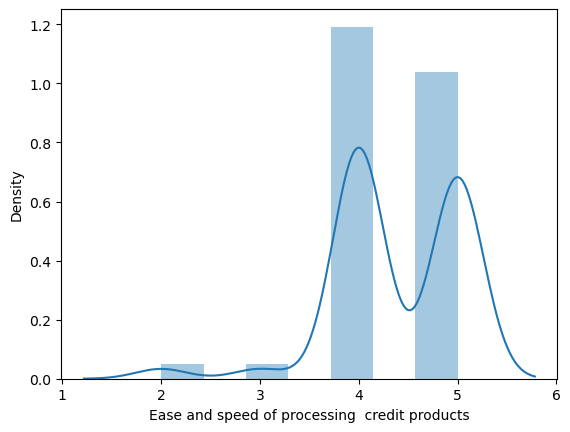

In [24]:
sns.distplot(df_young['Ease and speed of processing  credit products']) # Satisfaction

<AxesSubplot:xlabel='Company’s lifetime on the market', ylabel='Density'>

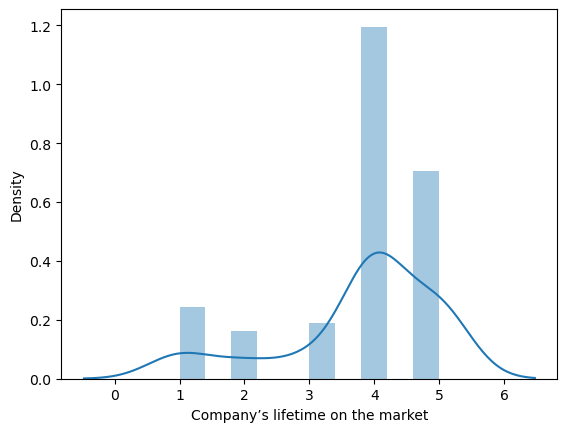

In [25]:
sns.distplot(df_young['Company’s lifetime on the market']) # Importance

<AxesSubplot:xlabel='A trustworthy company', ylabel='Density'>

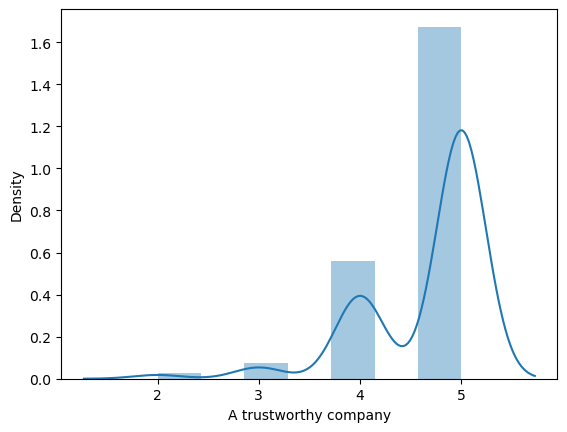

In [26]:
sns.distplot(df_young['A trustworthy company']) # Importance

<font size='4'>В столбиках Satisfoction	и Importance преобладают значения, близкие к 4 и 5.</font>

<font size='4'>В столбиках Importance 'A trustworthy company' и 'Service quality' имеют более высокие показатели, что означает, что эти направления более приоритетны для развития.</font>

# Посмотрим на недовольных пользователей

<font size='4'>Недовольными назовем тех, у которых хотя бы 1 из показателей Satisfoction меньше 4</font>

In [27]:
mask_sat = (df['A serious and stable company'] <= 3) | (df['Offers all common credit services'] <= 3) | (df['Ease and speed of processing  credit products'] <= 3)



In [28]:
df_young_unsat = df_young[mask_sat]

In [29]:
df_young_unsat#К сожалению недовольных пользователей довольно мало

,Main bank,Gender,Age,A serious and stable company,A progressive and modern company,Service quality,Offers all common credit services,Ease and speed of processing credit products,Company’s lifetime on the market,A trustworthy company
15,Bank Snowdrop,2,26,4,3,5,3,4,4,3
39,Bank Barberry,2,29,5,5,5,3,5,5,4
70,Bank Rose,1,22,1,3,5,4,5,1,4
89,Bank Rose,1,18,2,4,4,5,4,2,4
91,Bank Snowdrop,2,19,5,4,5,5,3,4,5
99,Bank Snowdrop,2,20,5,4,3,5,2,5,4
126,Bank Rose,1,18,2,4,4,5,4,2,4
146,Bank Snowdrop,2,26,4,3,5,3,4,4,3
164,Bank Rose,1,18,2,4,4,5,4,2,4
166,Bank Snowdrop,2,19,5,4,5,5,3,4,5


In [30]:
banks_unsat = df_young_unsat.groupby('Main bank')

In [31]:
for i in df['Main bank'].unique():
    if (i == 'Bank Aster' or i == 'Bank Bramble'): # Bank Aster и Bank Bramble нет недовольных
        continue
    bank = banks_unsat.get_group(i)
    print(i)
    print(bank[satisfaction].mean())
    print('\n')

Bank Rose
A serious and stable company                     1.8
Offers all common credit services                4.8
Ease and speed of processing  credit products    4.2
dtype: float64


Bank Snowdrop
A serious and stable company                     4.571429
Offers all common credit services                4.142857
Ease and speed of processing  credit products    3.142857
dtype: float64


Bank Barberry
A serious and stable company                     5.0
Offers all common credit services                3.0
Ease and speed of processing  credit products    5.0
dtype: float64




<font size='4'>Видно, что люди в разных банках недовольны чем-то конкретным, что наталкивает на мысль, что можно делать таргетированные рассылки для пользователей конкретного банка, где рекламировались бы стороны нашего банка, которых нехватает пользователям в их банке.</font>

# Посмотрим на корреляции

<AxesSubplot:>

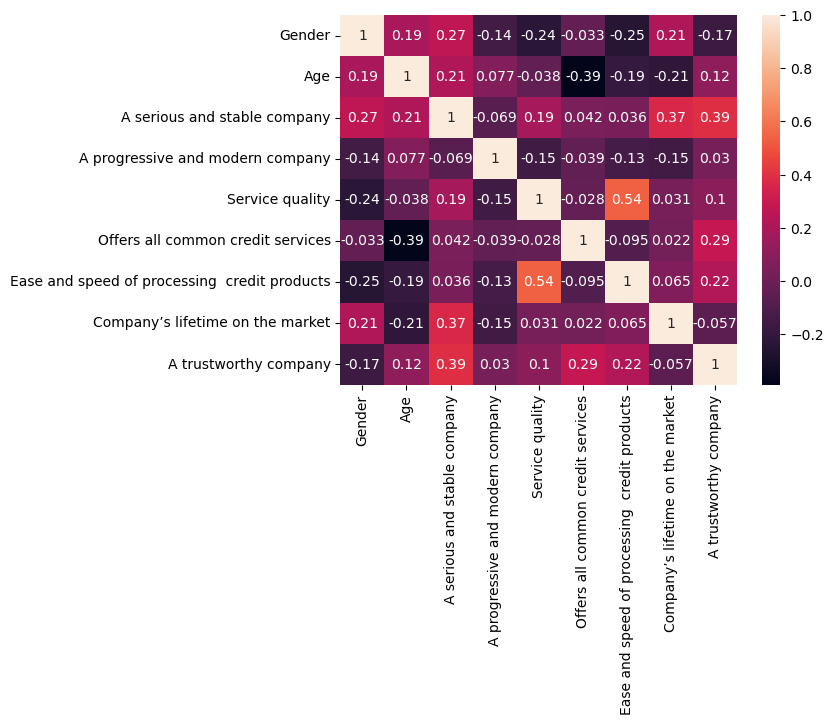

In [32]:
sns.heatmap(df_young.corr(),annot=True)

<font size='4'>Корреляции не превышают 0.6, что не очень хорошо для регрессий.</font>

# Посмотрим как наш банк смотрится на фоне остальных на рынке молодых пользователей


In [33]:
young_proportions = []
young_all = []
for i in df['Main bank'].unique():
    young_proportions.append(df_young[df_young['Main bank'] == i].shape[0] / df[df['Main bank'] == i].shape[0])
    young_all.append(df_young[df_young['Main bank'] == i].shape[0] / df_young.shape[0])

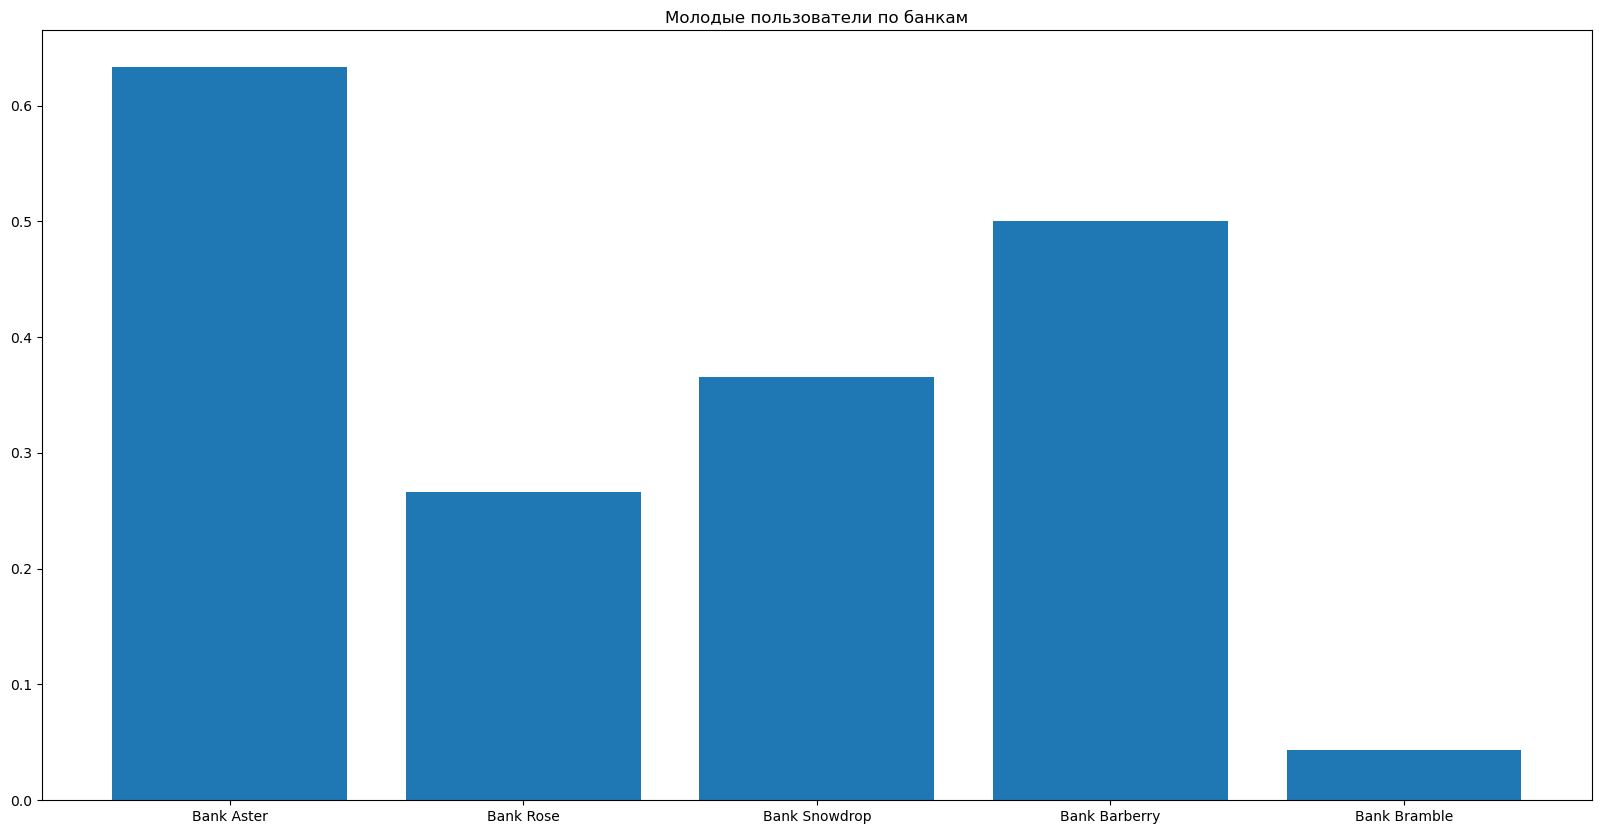

In [37]:
plt.figure(figsize=(20,10))
plt.bar(df['Main bank'].unique(),young_proportions)
plt.title('Молодые пользователи по банкам')
plt.show()

<font size='4'>Доля молодых в Aster самая высокая</font>

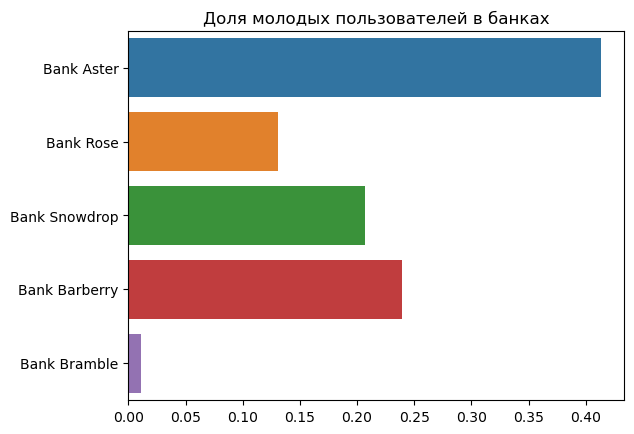

In [38]:
sns.barplot(young_all,df['Main bank'].unique(),orient='h') 
plt.title('Доля молодых пользователей в банках')
plt.show()


<font size='4'>Доля Aster на рынке молодых пользователей тоже самая высокая</font>

<font size='4'>Еще один минус этих данных, Aster лучший банк, мы не можем смотреть на опыт лучшего банка и учиться у него.</font>